In [ ]:
from tensorflow import keras
from keras import activations
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
print('x_train shape :', x_train.shape)
print('x_test shape :',x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (50000, 32, 32, 3)
x_test shape : (10000, 32, 32, 3)
y_train shape : (50000, 1)
y_test shape : (10000, 1)


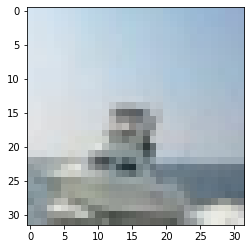

In [ ]:
plt.imshow(x_train[100])

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
from keras.layers import *
from keras.models import Sequential, Model

In [ ]:
input_size = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
print(input_size)

(32, 32, 3)


In [ ]:
# G = Sequential()

# G.add(InputLayer((input_size[1], ), name='input_layer'))
# G.add(Dense(256 * 7 * 7, activation='LeakyReLU', name='first_Dense_layer'))
# G.add(Reshape((7, 7, 256)))

# G.add(UpSampling2D())
# G.add(Conv2D(256, 3))
# G.add(BatchNormalization(momentum=0.8))
# G.add(Activation("LeakyReLU"))

# G.add(UpSampling2D())
# G.add(Conv2D(128, 3))
# G.add(BatchNormalization(momentum=0.8))
# G.add(Activation("LeakyReLU"))

# G.add(Conv2D(x_train.shape[3], 5, activation='tanh'))

# G.summary()

In [ ]:
# D = Sequential()

# D.add(Input(shape=input_size))

# D.add(Conv2D(32, 3, activation='LeakyReLU'))
# D.add(BatchNormalization(momentum=0.9))
# D.add(Dropout(0.25))

# D.add(Conv2D(64, 3, activation='LeakyReLU'))
# D.add(BatchNormalization(momentum=0.9))
# D.add(Dropout(0.25))

# D.add(Conv2D(128, 3, activation='LeakyReLU'))
# D.add(BatchNormalization(momentum=0.9))
# D.add(Dropout(0.25))

# D.add(Conv2D(256, 3, activation='LeakyReLU'))
# D.add(BatchNormalization(momentum=0.9))
# D.add(Dropout(0.25))

# D.add(Flatten())
# D.add(Dense(1, activation='softmax'))

# D.summary()

In [ ]:
#GAN에서 generator와 discriminator를 구현할 때 필요한 기법들이 있다. generator의 마지막 layer의 activation function은 softmax나 sigmoid가 아닌 tanh를 쓰는 것 등

# input = Input(input_size[1], name='InputLayer')

# d1 = Dense(128 * 16 * 16, activation='LeakyReLU')(input)
# r1 = Reshape((16, 16, 128))(d1)

# up1 = UpSampling2D()(r1)
# c1 = Conv2D(256, 3, padding='same', activation='LeakyReLU')(up1)
# b1 = BatchNormalization(momentum=0.8)(c1)

# # up2 = UpSampling2D()(b1)
# c2 = Conv2D(128, 3, padding='same', activation='LeakyReLU')(b1)
# b2 = BatchNormalization(momentum=0.8)(c2)

# c3 = Conv2D(x_train.shape[3], 3, padding='same', activation='tanh')(b2)

# G = Model(inputs=input, outputs=c3, name='generator')

# G.summary()

In [ ]:
#GAN에서 generator와 discriminator를 구현할 때 필요한 기법들이 있다. generator의 마지막 layer의 activation function은 softmax나 sigmoid가 아닌 tanh를 쓰는 것 등

input = Input(input_size[1], name='InputLayer')

l = Dense(256 * 8 * 8, activation='LeakyReLU')(input)
l = Reshape((8, 8, 256))(l)

l = Conv2D(256, 3, padding='same', activation='LeakyReLU')(l)
# l = BatchNormalization(momentum=0.8)(l)

l = UpSampling2D()(l)
l = Conv2D(256, 3, padding='same', activation='LeakyReLU')(l)
# b2 = BatchNormalization(momentum=0.8)(c2)

l = UpSampling2D()(l)
l = Conv2D(128, 3, padding='same', activation='LeakyReLU')(l)
l = Conv2D(64, 3, padding='same', activation='LeakyReLU')(l)
l = Conv2D(32, 3 ,padding='same', activation='LeakyReLU')(l)

l = Conv2D(x_train.shape[3], 3, padding='same', activation='tanh')(l)

G = Model(inputs=input, outputs=l, name='generator')

G.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 32)]              0         
                                                                 
 dense (Dense)               (None, 16384)             540672    
                                                                 
 reshape (Reshape)           (None, 8, 8, 256)         0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 256)         590080    
                                                                 
 up_sampling2d (UpSampling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       590080    
                                                         

In [ ]:
input = Input(shape=input_size)

l = Conv2D(32, 3, activation='LeakyReLU')(input)
# l = BatchNormalization(momentum=0.9)(l)
# l = Dropout(0.25)(l)

l = Conv2D(64, 3, activation='LeakyReLU')(l)
# l = BatchNormalization(momentum=0.9)(l)
# l = Dropout(0.25)(l)

l = Conv2D(128, 3, activation='LeakyReLU')(l)
# l = BatchNormalization(momentum=0.9)(l)
# drop3 = Dropout(0.25)(l)

c4 = Conv2D(256, 3, activation='LeakyReLU')(l)
# l = BatchNormalization(momentum=0.9)(l)

l = Flatten()(l)
# l = Dense(256, activation='relu')(l)
# l = Dense(128, activation='relu')(l)
# l = Dense(64, activation='relu')(l)
# l = Dense(32, activation='relu')(l)
l = Dropout(0.25)(l)
l = Dense(1, activation='softmax')(l)

D = Model(inputs=input, outputs=l, name='discriminator')

D.summary()

D.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: ignored

In [ ]:
noise = Input(shape=(input_size[1],))
gan = Model(inputs=noise, outputs=D(G(noise)))
gan.summary()

gan.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

https://github.com/eriklindernoren/Keras-GAN/blob/master/dcgan/dcgan.py

In [ ]:
# def plot_learning_curve(history):
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     epochs = range(1, len(acc) + 1)

#     plt.figure(figsize=(15, 5))

#     plt.subplot(121)
#     plt.title('Training and validation accuracy')
#     plt.plot(epochs, acc, '-', label='Training acc')
#     plt.plot(epochs, val_acc, '-', label='Validation acc')
#     plt.legend()

#     plt.subplot(122)
#     plt.title('Training and validation loss')
#     plt.plot(epochs, loss, '-', label='Training loss')
#     plt.plot(epochs, val_loss, '-', label='Validation loss')
#     plt.legend()

#     plt.show()

In [ ]:
# gan_history = gan.fit

In [ ]:
# plot_learning_curve(generator_history)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
batch_size = 20
iterations = 1000
latent_dim = input_size[1]

In [ ]:
from numpy.random import seed as np_seed
np_seed(42)

In [ ]:
import numpy as np
import os
from keras.preprocessing import image

In [ ]:
with tf.device('/device:GPU:0'):
  start = 0
  for step in range(iterations):
      #batch size 개수 만큼의 normal distribution(정규분포)로 (batch_size, laten_dim)크기를 가진 random sample 생성
      random_vectors = np.random.normal(size=(batch_size, latent_dim))
      if step == 1: print('random_vectors :', random_vectors.shape)

      #random sample을 generator에 넣어 decoding
      generated_images = G.predict(random_vectors)
      if step == 1: print('generated_images :', generated_images.shape)

      #batch size 만큼의 real image를 generator로 decoding한 image와 합침
      stop = start + batch_size
      real_images = x_train[start: stop]
      if step == 1:
        print('real_images:', real_images.shape)
        print('=' * 50)
      
      combined_images = np.concatenate([generated_images, real_images])

      #decoding image(fake image)와 real image의 개수만큼의 0, 1로 이루어진 label 생성
      labels = np.concatenate([np.ones((batch_size, 1)),
                              np.zeros((batch_size, 1))])
      
      #(랜덤한 0~1 균일분포) * 0.05 값을 더해 label 업데이트
      #왜지?
      labels += 0.05 * np.random.random(labels.shape)

      #fake와 real이 섞인 image들과 업데이트된 label을 갖고 discriminator training
      d_loss = D.train_on_batch(combined_images, labels)

      #또다른 random sample 생성
      random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

      #misleading(오해의 소지가 있는)
      #batch size만큼의 0으로 이루어진 misledaing한 target 생성
      misleading_targets = np.zeros((batch_size, 1))
     
      #또다른 fake image는 거짓(0)이라고 gan training
      a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
      
      #batch size만큼을 방금 사용했으니 start point 업데이트
      #if문을 통해 range를 초과하는 index error 방지
      start += batch_size
      if start > len(x_train) - batch_size:
        start = 0

      #100번 진행할 때마다 process 시각화
      #gan이 생성한 imgae 하나를 시각화
      if step % 100 == 0:
          # gan.save_weights('gan.h5')

          print('discriminator loss at step %s : %s' % (step, d_loss))
          print('gan loss at step %s : %s' % (step, a_loss))

          # # 생성된 이미지 하나를 저장합니다
          # img = image.array_to_img(generated_images[0] * 255., scale=False)
          # img.save(os.path.join(save_dir, 'generated_frog' + str(step) + '.png'))
          img = image.array_to_img(generated_images[0] * 255., scale=False)
          plt.imshow(img)

          # # 비교를 위해 진짜 이미지 하나를 저장합니다
          # img = image.array_to_img(real_images[0] * 255., scale=False)
          # img.save(os.path.join(save_dir, 'real_frog' + str(step) + '.png'))

In [ ]:
random_latent_vectors = np.random.normal(size=(10, latent_dim))

# 가짜 이미지 디코딩
generated_images = G.predict(random_latent_vectors )

for i in range(generated_images.shape[0]):
  img = image.array_to_img(generated_images[i] * 255. , scale = False)
  plt.figure()
  plt.imshow(img)

plt.show()